# MT5 POC

In [ ]:
!pip install google.colab datasets transformers sentencepiece

In [ ]:
from datasets import load_dataset
# from google.colab import driva
from IPython.display import display
from IPython.html import widgets

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import torch

from torch import optim
from torch.nn import functional as F

import tqdm
# from tqdm import tqdm_notebook

from transformers import AdamW, AutoModelForSeq2SeqLM, AutoTokenizer
from transformers import get_linear_schedule_with_warmup

/usr/local/lib/python3.8/dist-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [ ]:
model_repo = 'google/mt5-small'
tokenizer = AutoTokenizer.from_pretrained(model_repo)
model = AutoModelForSeq2SeqLM.from_pretrained(model_repo)
if torch.cuda.is_available():
  model = model.cuda()

/usr/local/lib/python3.8/dist-packages/transformers/convert_slow_tokenizer.py:446: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [ ]:
# Maximum tokens length the pre-trained model can handle
model.config.max_length

20

In [ ]:
input = "Here is a test sentence"
token_ids = tokenizer.encode(input, return_tensors="pt")
if torch.cuda.is_available():
  token_ids = token_ids.cuda()
print(token_ids)

tensor([[10421,   339,   259,   262,  2978,   259, 98923,     1]])


In [ ]:
model_out = model.generate(token_ids)
print(model_out)

output_text = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(model_out[0]))
print(output_text)

/usr/local/lib/python3.8/dist-packages/transformers/generation/utils.py:1387: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 20 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


tensor([[     0, 250099,      1]])
<pad> <extra_id_0></s>


In [ ]:
example_input_string = "<jp>this is a test asdf"
input_ids = tokenizer.encode(example_input_string)
print("Input ids:", input_ids)

tokens = tokenizer.convert_ids_to_tokens(input_ids)
print("Tokens:", tokens)

Input ids: [1042, 3889, 669, 860, 339, 259, 262, 2978, 527, 6386, 1]
Tokens: ['▁<', 'jp', '>', 'this', '▁is', '▁', 'a', '▁test', '▁as', 'df', '</s>']


In [ ]:
type(tokenizer.vocab)

dict

## New Dataset: opus100

In [ ]:
# !rm ./*
# !wget https://www2.nict.go.jp/astrec-att/member/mutiyama/ALT/ALT-Parallel-Corpus-20191206.zip
# !ls
# !unzip ALT-Parallel-Corpus-20191206.zip; rm ALT-Parallel-Corpus-20191206.zip
# !mv ALT-Parallel-Corpus-20191206/* ./;rm -r ALT-Parallel-Corpus-20191206 sample_data
# !rm ALT-O-COCOSDA.pdf ChangeLog.txt README.txt URL.txt

In [ ]:
dataset = load_dataset("opus100", "en-hi")
df = dataset['test']
df['translation']
# df.columns = ["en", "hi", "zh"]

# df = df[[lang1, lang2]]
# # df = df.sample(frac=1).reset_index(drop=True)
# df.columns = ["source", "target"]
# print(df.shape)

  0%|          | 0/3 [00:00<?, ?it/s]

[{'en': 'Give shots of injections or pills, but he must be alright soon.',
  'hi': 'सुई लगाओ या गोली खिलाओ लेकिन इसे जल्दी से ठीक करो.'},
 {'en': 'They said, “O Shuaib, we do not understand much of what you say, and we see that you are weak among us. Were it not for your tribe, we would have stoned you. You are of no value to us.”',
  'hi': 'और वह लोग कहने लगे ऐ शुएब जो बाते तुम कहते हो उनमें से अक्सर तो हमारी समझ ही में नहीं आयी और इसमें तो शक नहीं कि हम तुम्हें अपने लोगों में बहुत कमज़ोर समझते है और अगर तुम्हारा क़बीला न होता तो हम तुम को (कब का) संगसार कर चुके होते और तुम तो हम पर किसी तरह ग़ालिब नहीं आ सकते'},
 {'en': '- Yeah.', 'hi': '- हाँ.'},
 {'en': 'If evil befalls him he is perturbed;',
  'hi': 'जि उसे तकलीफ़ पहुँचती है तो घबरा उठता है,'},
 {'en': '♪ BE FOREVER BOUND', 'hi': '♪हमेशाके लिएबाध्यहोने'},
 {'en': "Trying to movemail a non-mbox source '%s'",
  'hi': "एक गैर-mbox स्रोत '%s' में डाक भेजने की कोशिश"},
 {'en': 'Image histogram adjust levels plugin for digiKam',
  'hi': 'ड

In [ ]:
lang = "hi"
hi_df = pd.read_csv("data_"+lang+".txt", sep="\t", header=None, names=["id", lang])
lang = "zh"
zh_df = pd.read_csv("data_"+lang+".txt", sep="\t", header=None, names=["id", lang])
lang = "en"
en_df = pd.read_csv("data_"+lang+".txt", sep="\t", header=None, names=["id", lang])

print(en_df.size, en_df.shape)
print(hi_df.size, hi_df.shape)
print(zh_df.size, zh_df.shape)

lang1 = "zh"
lang2 = "hi"
newFlag = True


if (newFlag):
  df = pd.DataFrame().assign(A=en_df['en'], C=hi_df['hi'], D=zh_df['zh'])
  df.columns = ["en", "hi", "zh"]

  df = df[[lang1, lang2]]
  # df = df.sample(frac=1).reset_index(drop=True)
else:
  df = pd.read_csv("DATASET.txt", sep="\t", header=None, names=["target", "source"])

df.columns = ["source", "target"]
print(df.shape)
df.iloc[100:105,:]

39816 (19908, 2)
39844 (19922, 2)
40212 (20106, 2)
(19908, 2)


,source,target
100,新芬党的马丁·麦吉尼斯表示：“如果民主统一党不准备在6月份开展工作或给出任何实质性的指示，那...,अगर DUP जून के दौरान काम करने या कोई ठोस संकेत...
101,“现实情况是，这两个最大的政党根本没有表现出他们准备向前迈进的意愿。”,व्यावहारिक वास्तविकता यह है कि दो सबसे बड़ी पा...
102,“民主统一党的推诿和小动作阻碍了进步的可能，让我们所有人都受到公众的嘲笑。”,DUP द्वारा प्रचलित और क्षुद्र प्रकोप प्रगति की...
103,星期一，伊恩·佩斯利要求将11月24日截止日期延长两周。,"सोमवार को, इयान पैस्ले ने 24 नवंबर की समय सीमा..."
104,这是英国首相托尼·布莱尔和爱尔兰总理伯蒂·埃亨计划的一部分，他们计划在2002年10月议会因...,यह ब्रिटिश प्रधान मंत्री टोनी ब्लेयर और आयरिश ...


## Build data transformation pipeline

In [ ]:
# todo

## Old Pipeline

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.1, shuffle=False)
print(train_df.shape, test_df.shape)
train_df.iloc[3571:3571+10,0:2]

(17917, 2) (1991, 2)


,source,target
3571,周二，电子前线基金会（EFF）向电信巨头AT＆T提起集体诉讼。,"ईरानी टेलीविजन के बयान के अनुसार, ""MMS के संभा..."
3572,该诉讼在旧金山提起，指控AT＆T违反联邦法律，与政府合作窃听美国公民。,अनैतिक संदेशों को कैसे फ़िल्टर किया जाएगा या इ...
3573,布什政府和国家安全局在这个问题上遭到抨击。,"इस्लामिक क्रांति के बाद, रिवोल्यूशनरी गार्ड द्..."
3574,他们捍卫该计划，称他们只是在聆听可疑的恐怖分子。,Microsoft ने अपने बहुप्रतीक्षित Xbox 360 कंसोल...
3575,EFF声称AT&T移交了2个数据库，包括用户的通信和互联网使用记录。,जब अमेरिकी और यूरोपीय बाजारों में लॉन्च किया ग...
3576,EFF的代表律师凯文·班克斯顿表示，如果没有AT&T等公司的帮助，政府无法进行监控。,एक स्टोर-मालिक का कहना है कि इसकी रिलीज़ के पह...
3577,他还表示，他们的目标是告诉AT&T，与总统的窃听计划合作，不符合他们的财政利益，也不符合法律规定。,कई लोगों का मानना है कि जापान में ऐसे किसी भी ...
3578,根据集体诉讼，AT&T允许政府访问“通过其国内关键电信设施传输的全部或相当数量的通信，包括直...,PlayStation 2 के दो साल बाद रिलीज़ होने के कार...
3579,除了惩罚性罚款外，诉讼还要求对每个AT&T客户赔偿22000美元。,इसमें कंसोल के बड़े आकार और खेलों की बदलती शैल...
3580,AT&T还面临美国联邦通信委员会的审查，可能会因未能正确证明客户记录受到了保护而被罚款。,ऑस्ट्रेलिया के स्वास्थ्य सेवा संघ (HSU) के सदस...


In [ ]:
token_ids = tokenizer.encode(example_input_string, return_tensors="pt", padding="max_length", truncation=True, max_length=model.config.max_length)
print(token_ids)

tensor([[1042, 3889,  669,  860,  339,  259,  262, 2978,  527, 6386,    1,    0,
            0,    0,    0,    0,    0,    0,    0,    0]])


In [ ]:
inputs = []
for d in train_df.source.items():
  inputs.append(tokenizer.encode(d[1], return_tensors="np", padding="max_length", truncation=True, max_length=model.config.max_length)[0])

outputs = []
for d in train_df.target.items():
  outputs.append(tokenizer.encode(d[1], return_tensors="np", padding="max_length", truncation=True, max_length=model.config.max_length)[0])

print(len(inputs), len(outputs))

AttributeError: ignored

In [ ]:
input_pt = torch.tensor(inputs).cuda()
print(input_pt.shape)

output_pt = torch.tensor(outputs).cuda()
print(output_pt.shape)

torch.Size([2293, 20])
torch.Size([2293, 20])


<ipython-input-84-964d79a66211>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  input_pt = torch.tensor(inputs).cuda()


In [ ]:
input_pt[:8].shape

torch.Size([8, 20])

In [ ]:
# Constants
n_epochs = 8
batch_size = 16
print_freq = 50
checkpoint_freq = 100
lr = 5e-4
n_batches = int(np.ceil(len(train_df) / batch_size))
total_steps = n_epochs * n_batches
n_warmup_steps = int(total_steps * 0.01)

In [ ]:
# Optimizer
optimizer = AdamW(model.parameters(), lr=lr)
scheduler = get_linear_schedule_with_warmup(optimizer, n_warmup_steps, total_steps)

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
losses = []

In [ ]:
def get_data_generator(inputs, outputs, batch_size=16):
  # inputs = inputs.shuffle()
  # outputs = outputs.shuffle()

  for i in range(0, len(inputs), batch_size):
    input_batch = inputs[i:i+batch_size]
    output_batch = outputs[i:i+batch_size]
  
    yield (input_batch, output_batch)

In [ ]:
def eval_model(model, gdataset, max_iters=8):
  test_generator = get_data_generator(input_pt, output_pt, batch_size)
  eval_losses = []
  for i, (input_batch, label_batch) in enumerate(test_generator):
    if i >= max_iters:
      break

    model_out = model.forward(
        input_ids = input_batch,
        labels = label_batch)
    eval_losses.append(model_out.loss.item())

  return np.mean(eval_losses)

In [ ]:
for epoch_idx in range(n_epochs):
  # Randomize data order
  data_generator = get_data_generator(input_pt, output_pt, batch_size)
                
  for batch_idx, (input_batch, label_batch) in tqdm.notebook.tqdm(enumerate(data_generator), total=n_batches):
    optimizer.zero_grad()

    # Forward pass
    model_out = model.forward(
        input_ids = input_batch,
        labels = label_batch)

    # Calculate loss and update weights
    loss = model_out.loss
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    scheduler.step()

    # Print training update info
    if (batch_idx + 1) % print_freq == 0:
      avg_loss = np.mean(losses[-print_freq:])
      print('Epoch: {} | Step: {} | Avg. loss: {:.3f} | lr: {}'.format(
          epoch_idx+1, batch_idx+1, avg_loss, scheduler.get_last_lr()[0]))
      
    if (batch_idx + 1) % checkpoint_freq == 0:
      test_loss = eval_model(model, test_df)
      print('Test loss of {:.3f}'.format(test_loss))
      # torch.save(model.state_dict(), model_path)

# torch.save(model.state_dict(), model_path)

  0%|          | 0/144 [00:00<?, ?it/s]

Epoch: 1 | Step: 50 | Avg. loss: 20.841 | lr: 0.00048290972830850135
Epoch: 1 | Step: 100 | Avg. loss: 4.894 | lr: 0.0004609991235758107
Saving model with test loss of 3.233


  0%|          | 0/144 [00:00<?, ?it/s]

Epoch: 2 | Step: 50 | Avg. loss: 1.991 | lr: 0.0004198071866783523
Epoch: 2 | Step: 100 | Avg. loss: 1.779 | lr: 0.0003978965819456617
Saving model with test loss of 1.462


  0%|          | 0/144 [00:00<?, ?it/s]

Epoch: 3 | Step: 50 | Avg. loss: 1.319 | lr: 0.00035670464504820333
Epoch: 3 | Step: 100 | Avg. loss: 1.385 | lr: 0.00033479404031551267
Saving model with test loss of 1.157


  0%|          | 0/144 [00:00<?, ?it/s]

Epoch: 4 | Step: 50 | Avg. loss: 1.112 | lr: 0.0002936021034180543
Epoch: 4 | Step: 100 | Avg. loss: 1.050 | lr: 0.00027169149868536374
Saving model with test loss of 0.892


  0%|          | 0/144 [00:00<?, ?it/s]

Epoch: 5 | Step: 50 | Avg. loss: 0.839 | lr: 0.00023049956178790534
Epoch: 5 | Step: 100 | Avg. loss: 0.805 | lr: 0.00020858895705521473
Saving model with test loss of 0.683


  0%|          | 0/144 [00:00<?, ?it/s]

Epoch: 6 | Step: 50 | Avg. loss: 1.178 | lr: 0.00016739702015775633
Epoch: 6 | Step: 100 | Avg. loss: 0.784 | lr: 0.00014548641542506575
Saving model with test loss of 0.687


  0%|          | 0/144 [00:00<?, ?it/s]

Epoch: 7 | Step: 50 | Avg. loss: 0.625 | lr: 0.00010429447852760737
Epoch: 7 | Step: 100 | Avg. loss: 0.541 | lr: 8.238387379491674e-05
Saving model with test loss of 0.494


  0%|          | 0/144 [00:00<?, ?it/s]

Epoch: 8 | Step: 50 | Avg. loss: 0.472 | lr: 4.119193689745837e-05
Epoch: 8 | Step: 100 | Avg. loss: 0.426 | lr: 1.9281332164767748e-05
Saving model with test loss of 0.395


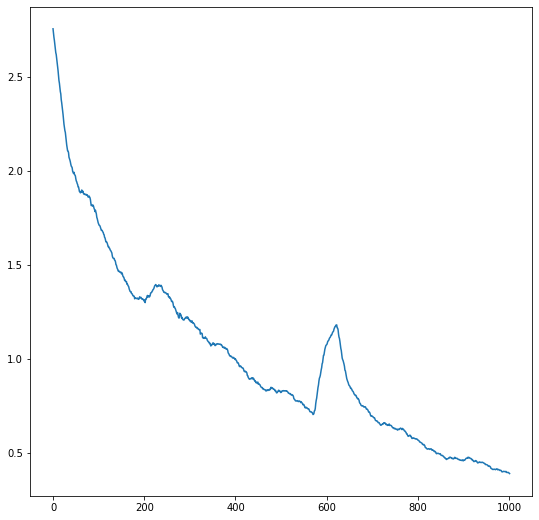

In [ ]:
# Graph the loss

window_size = 50
smoothed_losses = []
for i in range(len(losses)-window_size):
  smoothed_losses.append(np.mean(losses[i:i+window_size]))

plt.figure(figsize=(9, 9))
plt.plot(smoothed_losses[100:])

In [ ]:
test_df.head().target.tolist()

['This theory is too difficult for me to comprehend.',
 "I don't know when he will come.",
 'She is not afraid of anything.',
 'These books are mine.',
 'He knows us very well.']

In [ ]:
id_to_test = 3
test_sentence_source = test_df.source.tolist()[id_to_test]
test_sentence_target = test_df.target.tolist()[id_to_test]
print("Input:")
print('Raw input text in Hindi:', test_sentence_source)
print('Expected text in English:', test_sentence_target)

input_ids = tokenizer.encode(test_sentence_source, return_tensors="pt", padding="max_length", truncation=True, max_length=model.config.max_length)[0]
input_ids = input_ids.unsqueeze(0).cuda()
# print(input_ids)
print()

# print('Truncated input text:', tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[0])))
output_tokens = model.generate(input_ids, num_beams=10, num_return_sequences=3, max_length=model.config.max_length)
# print(output_tokens)
print("Output:")
for token_set in output_tokens:
  print(tokenizer.decode(token_set, skip_special_tokens=True, padding="max_length", truncation=True, max_length=model.config.max_length))

Input:
Raw input text in Hindi: ये किताबें मेरीं हैं।
Expected text in English: These books are mine.

Output:
The book is larger than that one.
She is a wealth of study history.
The book shelves are larger than letters.


# Push to Model Hub

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Token is valid.
Your token has been saved to /root/.huggingface/token
Login successful


In [ ]:
# repo_name = "mt5_hindi_to_english"
# model.push_to_hub(repo_name)
# model.config.push_to_hub(repo_name)
# tokenizer.push_to_hub(repo_name)

# Misc calculations

In [ ]:
!pip install --no-cache-dir transformers sentencepiece datasets

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

checkpoint = "google/mt5-small"
model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [ ]:
sequence = ["This is pretty good", "Okay"]
tokens = tokenizer(sequence, padding=True)
print(tokens)

In [ ]:
import pandas as pd

df = pd.read_csv("DATASET.txt", sep="\t")
df.head()

In [ ]:
df.ENG.astype(str).tolist()[:10]

In [ ]:
# Transform input tokens 
inputs = tokenizer("Hello world!", return_tensors="tf")

# Model apply
outputs = model(**inputs)

In [ ]:
import tensorflow as tf

sequences = df.ENG.astype(str).tolist()
batch = dict(tokenizer(sequences, padding=True, truncation=True, return_tensors="tf"))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")
labels = tf.convert_to_tensor(df.HIN.astype(str).tolist())
model.train_on_batch(batch, labels)